In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix,recall_score
from sklearn.model_selection import GridSearchCV

In [2]:
#loading dataset
df = pd.read_csv('framingham.csv')
df.head() #viewing first 5 observations

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,id
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,2
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,3
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,4
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,5


In [3]:
df.drop('id', axis=1, inplace=True) #dropping id column

In [4]:
df.info() #viewing feature characteristics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
#checking missing values
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#value counts of dependent variable
df['TenYearCHD'].value_counts()

#unbalanced distribution between 0 & 1

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [7]:
#distributions across gender
df.groupby('male').agg({'male':'count',
                        'age':'mean'})

,male,age
male,,
0,2420,49.795868
1,1820,49.293407


In [8]:
#changing male from 1 to 'male' and 0 for 'female'
df['male'] = df['male'].apply(lambda x: 'male' if x==1 else 'female')

In [9]:
#changing smoker from 1 to 'yes' and 'no' if otherwise
df['currentSmoker'] = df['currentSmoker'].apply(lambda x: 'no' if x==0 else 'yes')

In [10]:
#changing BPMeds from 1 to 'yes' and 'no' if 0, and 'nan' if no value exists
df['BPMeds'] = df['BPMeds'].apply(lambda x: 'no' if x==0 else ('yes' if x==1 else np.nan))

In [11]:
#changing prevalentStroke from 1 to 'yes' and 'no' if 0, and 'nan' if no value exists
df['prevalentStroke'] = df['prevalentStroke'].apply(lambda x: 'no' if x==0 else ('yes' if x==1 else np.nan))

In [12]:
#changing prevalentHyp from 1 to 'yes' and 'no' if 0, and 'nan' if no value exists
df['prevalentHyp'] = df['prevalentHyp'].apply(lambda x: 'no' if x==0 else ('yes' if x==1 else np.nan))

In [13]:
#changing prevalentHyp from 1 to 'yes' and 'no' if 0, and 'nan' if no value exists
df['diabetes'] = df['diabetes'].apply(lambda x: 'no' if x==0 else ('yes' if x==1 else np.nan))

In [14]:
#creating count of categorical values to plot
gender_value_counts = df['male'].value_counts()
smoking_value_counts = df['currentSmoker'].value_counts()
bpmeds = df['BPMeds'].value_counts()
hypertension = df['prevalentHyp'].value_counts()
diabetes = df['diabetes'].value_counts()
dependent_var = df['TenYearCHD'].value_counts()

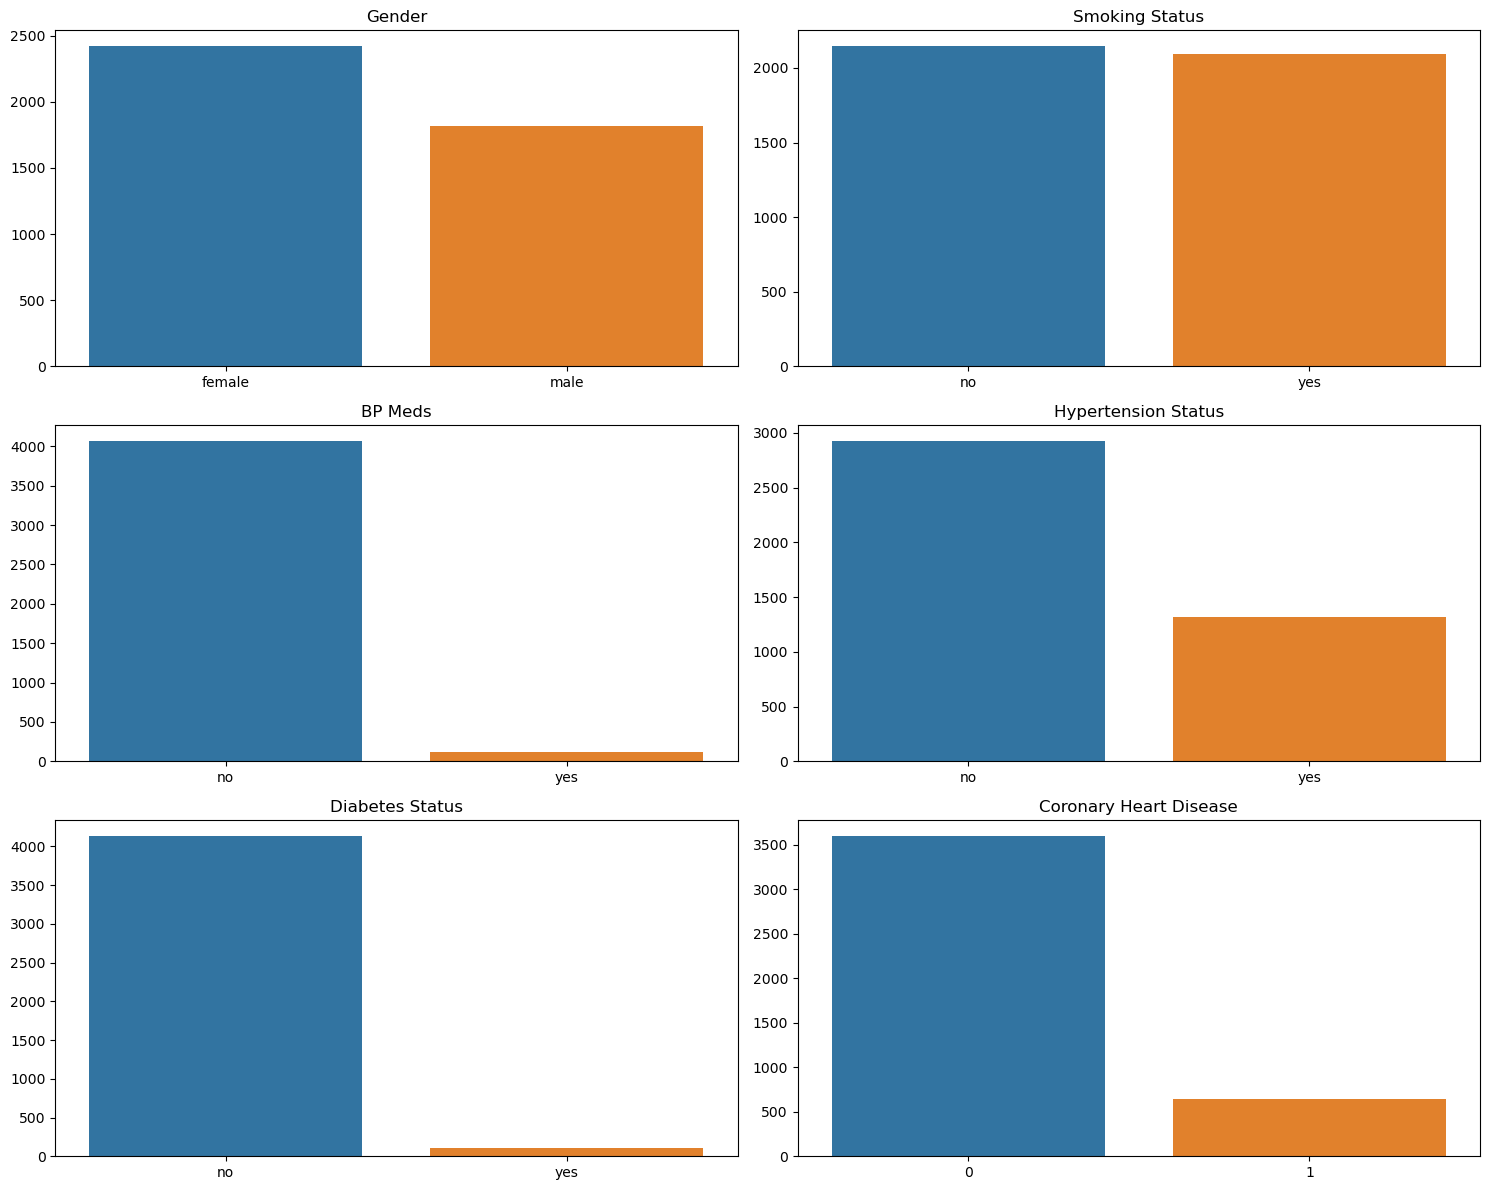

In [15]:
#plot of categorical variables
fig, axes = plt.subplots(3,2, figsize=(15,12))

sns.barplot(x=gender_value_counts.index, y=gender_value_counts.values, ax=axes[0,0])
axes[0,0].set_title('Gender')

sns.barplot(x=smoking_value_counts.index, y=smoking_value_counts.values, ax=axes[0,1])
axes[0,1].set_title('Smoking Status')

sns.barplot(x=bpmeds.index, y=bpmeds.values, ax=axes[1,0])
axes[1,0].set_title('BP Meds')

sns.barplot(x=hypertension.index, y=hypertension.values, ax=axes[1,1])
axes[1,1].set_title('Hypertension Status')

sns.barplot(x=diabetes.index, y=diabetes.values, ax=axes[2,0])
axes[2,0].set_title('Diabetes Status')

sns.barplot(x=dependent_var.index, y=dependent_var.values, ax=axes[2,1])
axes[2,1].set_title('Coronary Heart Disease')


plt.tight_layout()
plt.show()

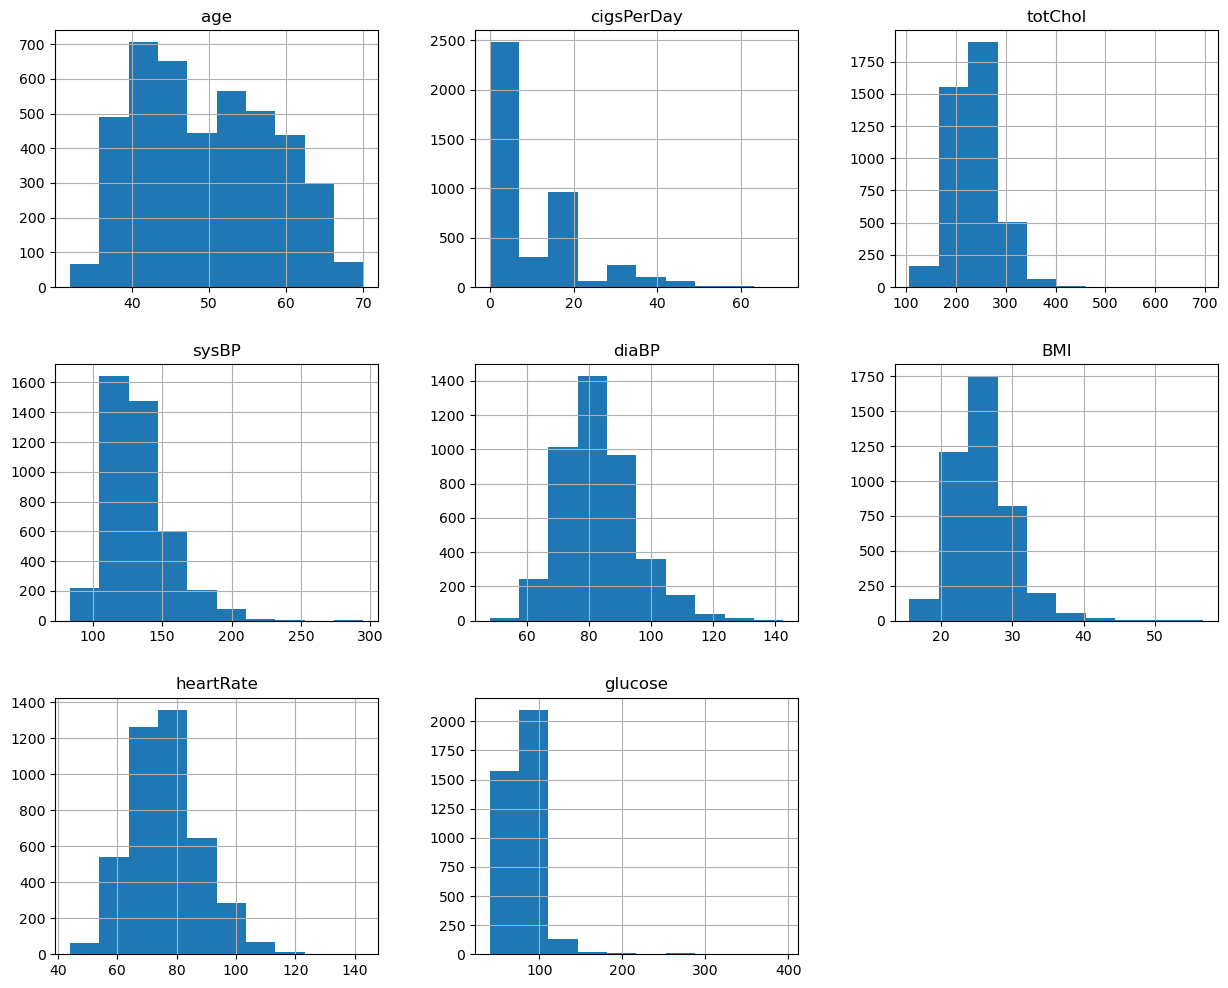

In [16]:
#plotting distribution of numerical variables to check measurement of scale of variables and skewness of data
df.iloc[:,[1] + [4] + list(range(9,15))].hist(figsize=(15,12))
plt.show()

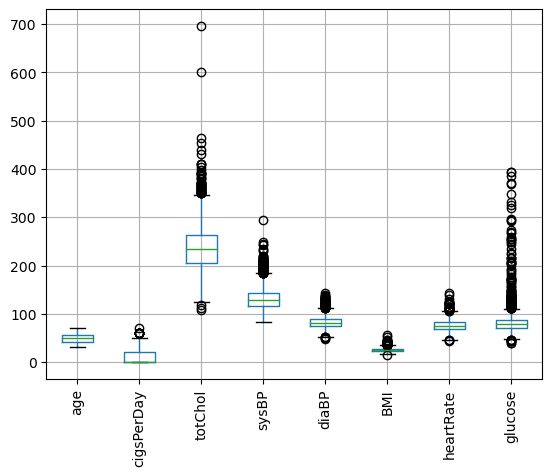

In [17]:
#checking outliers
df.iloc[:,[1] + [4] + list(range(9,15))].boxplot()
plt.xticks(rotation=90)
plt.show()

In [18]:
#creating input variables and outcome variables
X = df.drop('TenYearCHD', axis=1) #input/predictor variables
y = df['TenYearCHD'].values #outcome variable

In [19]:
mode_education = X.iloc[:,2].mode()[0]
X['education'] = X['education'].fillna(mode_education) #imputing mode for 'education' variable 

mode_bpmeds = X.iloc[:,5].mode()[0]
X['BPMeds'] = X['BPMeds'].fillna(mode_bpmeds) #imputing mode for 'BPMeds' variable 

In [20]:
mean = X.mean(numeric_only=True) #getting mean of variables for imputation

In [21]:
X.isna().sum() #remaining missing values to be computed

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64

In [22]:
X.fillna(mean, inplace=True) #imputing mean for the missing values

In [23]:
#due to skewness of numerical variables, log transformation is applied to address this issue
X.iloc[:,[1] + [4] + list(range(9,15))] = np.log(X.iloc[:,[1] + [4] + list(range(9,15))]+1)

In [24]:
#'education' is changed into a categorical variable
X['education'] = X['education'].astype('category')

In [25]:
#creating dummy variables for 'education'
X = pd.get_dummies(X,columns=['education']).copy()

In [26]:
#creating variables for categorical and numerical variables respectively
cat_attribs = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

num_attribs = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [27]:
X.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   float64
 2   currentSmoker    4240 non-null   object 
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   object 
 5   prevalentStroke  4240 non-null   object 
 6   prevalentHyp     4240 non-null   object 
 7   diabetes         4240 non-null   object 
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  education_1.0    4240 non-null   uint8  
 15  education_2.0    4240 non-null   uint8  
 16  education_3.0    4240 non-null   uint8  
 17  education_4.0 

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [29]:
#using column transformer to pre-process categorical and numerical variables
#Standard scaler is used to pre-process numerical variables to ensure that these variables are on the same scale
#OneHotEncoder is used to create dummy variables for categorical variables

col_transformer = ColumnTransformer([('scaler', StandardScaler(), num_attribs), 
                                     ('onehot', OneHotEncoder(drop='if_binary'), cat_attribs)],
                                     remainder='passthrough')

In [30]:
#creating train and test set with 25% being the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6, stratify=y)

In [31]:
#applying column transformer to transform the variables into the desired format
X_train = col_transformer.fit_transform(X_train)

In [32]:
#applying column transformer on test set
X_test = col_transformer.transform(X_test)

In [33]:
#columns to name dataset for SHAP analysis
cols = num_attribs+cat_attribs+['education_1.0', 'education_2.0', 'education_3.0', 'education_4.0']

In [34]:
len(cols)

18

In [35]:
#creating dataframe for SHAP analysis
shap_x_train = pd.DataFrame(X_train, columns=cols)
shap_x_test = pd.DataFrame(X_test, columns=cols)

### SMOTE & RANDOM UNDERSAMPLER

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [37]:
#to save results in a dataframe
model = []
accuracy = []
roc = []
recall = []

##### logistic regression

In [38]:
#a pipeline to avoid data leakage
pipeline = Pipeline([('smote', SMOTE(random_state=7)), 
                     ('under', RandomUnderSampler(random_state=9)), 
                     ('logistic', LogisticRegression(random_state=8))])

In [39]:
#using gridsearch for best parameters
params = {'under__sampling_strategy': [0.7, 0.8], 
          'smote__k_neighbors' : [3, 5, 7],
          'smote__sampling_strategy' : [0.5, 0.6, 0.7], 
          'logistic__max_iter' : [500, 1000], 
          'logistic__C':[0.01, 1, 10, 100]
         }

log_grid_search = GridSearchCV(estimator=pipeline, 
                               param_grid=params, 
                               cv=5, 
                               scoring='recall', 
                               n_jobs=-1)

log_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=7)),
                                       ('under',
                                        RandomUnderSampler(random_state=9)),
                                       ('logistic',
                                        LogisticRegression(random_state=8))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 1, 10, 100],
                         'logistic__max_iter': [500, 1000],
                         'smote__k_neighbors': [3, 5, 7],
                         'smote__sampling_strategy': [0.5, 0.6, 0.7],
                         'under__sampling_strategy': [0.7, 0.8]},
             scoring='recall')

In [40]:
#getting best parameters for Logistics regression
log_best_params = log_grid_search.best_params_

log_best_model = log_grid_search.best_estimator_

log_grid_predict = log_best_model.predict(X_test)

In [41]:
print(classification_report(y_test, log_grid_predict, target_names=['No Risk', 'Risk']))
print()
confusion_matrix(y_test, log_grid_predict)

              precision    recall  f1-score   support

     No Risk       0.91      0.74      0.82       899
        Risk       0.29      0.58      0.38       161

    accuracy                           0.72      1060
   macro avg       0.60      0.66      0.60      1060
weighted avg       0.81      0.72      0.75      1060




array([[665, 234],
       [ 67,  94]], dtype=int64)

In [42]:
#best parameters
log_best_params

{'logistic__C': 10,
 'logistic__max_iter': 500,
 'smote__k_neighbors': 7,
 'smote__sampling_strategy': 0.5,
 'under__sampling_strategy': 0.8}

In [43]:
#getting probabilities for class 1
log_proba = log_best_model.predict_proba(X_test)[:,1]
log_smote_roc = roc_auc_score(y_test, log_proba)

In [44]:
#getting values to plot ROC curve
smote_log_fpr, smote_log_tpr, smote_log_threshold = roc_curve(y_test, log_proba)

In [45]:
#saving values in list created for dataframe
model.append('Logistics regression ROS-SMOTE')
accuracy.append(accuracy_score(y_test, log_grid_predict))
roc.append(log_smote_roc)
recall.append(recall_score(y_test, log_grid_predict))

##### random forest

In [46]:
#a pipeline to avoid data leakage
pipeline_rf = Pipeline([('smote', SMOTE(random_state=4)), 
                        ('under', RandomUnderSampler(random_state=6)), 
                        ('randomforest', RandomForestClassifier(random_state=65))])

In [47]:
#using gridsearch for best parameters
params_rf = {'under__sampling_strategy': [0.7, 0.8], 
          'smote__k_neighbors' : [3, 5, 7],
          'smote__sampling_strategy' : [0.5, 0.6, 0.7], 
          'randomforest__n_estimators': [30, 50, 100], 
          'randomforest__max_depth': [None, 5, 10, 12],
          'randomforest__max_features': ['auto', 'sqrt']
         }

rf_grid_search = GridSearchCV(estimator=pipeline_rf, 
                               param_grid=params_rf, 
                               cv=5, 
                               scoring='recall', 
                               n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=4)),
                                       ('under',
                                        RandomUnderSampler(random_state=6)),
                                       ('randomforest',
                                        RandomForestClassifier(random_state=65))]),
             n_jobs=-1,
             param_grid={'randomforest__max_depth': [None, 5, 10, 12],
                         'randomforest__max_features': ['auto', 'sqrt'],
                         'randomforest__n_estimators': [30, 50, 100],
                         'smote__k_neighbors': [3, 5, 7],
                         'smote__sampling_strategy': [0.5, 0.6, 0.7],
                         'under__sampling_strategy': [0.7, 0.8]},
             scoring='recall')

In [48]:
#getting best parameters for Random Forest
rf_best_params = rf_grid_search.best_params_

rf_best_model = rf_grid_search.best_estimator_

rf_grid_predict = rf_best_model.predict(X_test)

In [49]:
print(classification_report(y_test, rf_grid_predict, target_names=['No Risk', 'Risk']))
print()
confusion_matrix(y_test, rf_grid_predict)

              precision    recall  f1-score   support

     No Risk       0.90      0.80      0.85       899
        Risk       0.31      0.48      0.38       161

    accuracy                           0.76      1060
   macro avg       0.60      0.64      0.61      1060
weighted avg       0.81      0.76      0.78      1060




array([[723, 176],
       [ 83,  78]], dtype=int64)

In [50]:
#best parameters
rf_best_params

{'randomforest__max_depth': 5,
 'randomforest__max_features': 'auto',
 'randomforest__n_estimators': 50,
 'smote__k_neighbors': 5,
 'smote__sampling_strategy': 0.5,
 'under__sampling_strategy': 0.8}

In [51]:
#getting probabilities for class 1
rf_proba = rf_best_model.predict_proba(X_test)[:,1]
rf_smote_roc = roc_auc_score(y_test, rf_proba)

In [52]:
#getting values to plot ROC curve
smote_rf_fpr, smote_rf_tpr, smote_rf_threshold = roc_curve(y_test, rf_proba)

In [53]:
#saving values in list created for dataframe
model.append('Random Forest ROS-SMOTE')
accuracy.append(accuracy_score(y_test, rf_grid_predict))
roc.append(rf_smote_roc)
recall.append(recall_score(y_test, rf_grid_predict))

##### xgboost

In [54]:
#a pipeline to avoid data leakage
pipeline_xg = Pipeline([('smote', SMOTE(random_state=5)), 
                        ('under', RandomUnderSampler(random_state=3)), 
                        ('xgboost', XGBClassifier(random_state=85))])

In [55]:
#using gridsearch for best parameters
params_xg = {'under__sampling_strategy': [0.7, 0.8], 
          'smote__k_neighbors' : [3, 5, 7],
          'smote__sampling_strategy' : [0.5, 0.6, 0.7], 
          'xgboost__n_estimators': [100, 200, 500], 
          'xgboost__max_depth': [None, 3, 5, 7]
          
         }

xg_grid_search = GridSearchCV(estimator=pipeline_xg, 
                               param_grid=params_xg, 
                               cv=5, 
                               scoring='recall', 
                               n_jobs=-1)

xg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=5)),
                                       ('under',
                                        RandomUnderSampler(random_state=3)),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_type...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=85, ...))]),
             n_jobs=-1,
             param_grid={'smote__k_neighbors': [3, 5, 7],
                         'smote__sampling_strategy': [0.5, 0.6, 0.7],
                         'under__sampling_strategy': [0.7, 0.8],
                         'xgboost__max_depth': [None, 3, 5, 7],
                         'xgboost__n_estimators': [100, 200, 500]},
             scoring='recall')

In [56]:
#getting best parameters for XGBoost
xg_best_params = xg_grid_search.best_params_

xg_best_model = xg_grid_search.best_estimator_

xg_grid_predict = xg_best_model.predict(X_test)

In [57]:
print(classification_report(y_test, xg_grid_predict, target_names=['No Risk', 'Risk']))
print()
confusion_matrix(y_test, xg_grid_predict)

              precision    recall  f1-score   support

     No Risk       0.87      0.89      0.88       899
        Risk       0.30      0.27      0.29       161

    accuracy                           0.79      1060
   macro avg       0.59      0.58      0.58      1060
weighted avg       0.78      0.79      0.79      1060




array([[796, 103],
       [117,  44]], dtype=int64)

In [58]:
#best parameters
xg_best_params

{'smote__k_neighbors': 5,
 'smote__sampling_strategy': 0.5,
 'under__sampling_strategy': 0.8,
 'xgboost__max_depth': 3,
 'xgboost__n_estimators': 100}

In [59]:
#getting probabilities for class 1
xgboost_proba = xg_best_model.predict_proba(X_test)[:,1]
xg_smote_roc = roc_auc_score(y_test, xgboost_proba)

In [60]:
#getting values to plot ROC curve
smote_xg_fpr, smote_xg_tpr, smote_xg_threshold = roc_curve(y_test, xgboost_proba)

In [61]:
#saving values in list created for dataframe
model.append('XGBoost ROS-SMOTE')
accuracy.append(accuracy_score(y_test, xg_grid_predict))
roc.append(xg_smote_roc)
recall.append(recall_score(y_test, xg_grid_predict))

##### svm

In [62]:
#a pipeline to avoid data leakage
pipeline_svm = Pipeline([('smote', SMOTE(random_state=3)), 
                        ('under', RandomUnderSampler(random_state=5)), 
                        ('svcc', SVC(random_state=45, probability=True))])

In [63]:
#using gridsearch for best parameters
params_svm = {'under__sampling_strategy': [0.7, 0.8], 
          'smote__k_neighbors' : [3, 5, 7],
          'smote__sampling_strategy' : [0.5, 0.6, 0.7], 
          'svcc__kernel': ['linear', 'rbf', 'poly'],
             
          
         }

svm_grid_search = GridSearchCV(estimator=pipeline_svm, 
                               param_grid=params_svm, 
                               cv=5, 
                               scoring='recall', 
                               n_jobs=-1)

svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=3)),
                                       ('under',
                                        RandomUnderSampler(random_state=5)),
                                       ('svcc',
                                        SVC(probability=True,
                                            random_state=45))]),
             n_jobs=-1,
             param_grid={'smote__k_neighbors': [3, 5, 7],
                         'smote__sampling_strategy': [0.5, 0.6, 0.7],
                         'svcc__kernel': ['linear', 'rbf', 'poly'],
                         'under__sampling_strategy': [0.7, 0.8]},
             scoring='recall')

In [64]:
#getting best parameters for XGBoost
svc_best_params = svm_grid_search.best_params_

svc_best_model = svm_grid_search.best_estimator_

svc_grid_predict = svc_best_model.predict(X_test)

In [65]:
print(classification_report(y_test, svc_grid_predict, target_names=['No Risk', 'Risk']))
print()
confusion_matrix(y_test, svc_grid_predict)

              precision    recall  f1-score   support

     No Risk       0.92      0.74      0.82       899
        Risk       0.30      0.63      0.41       161

    accuracy                           0.72      1060
   macro avg       0.61      0.68      0.61      1060
weighted avg       0.82      0.72      0.76      1060




array([[664, 235],
       [ 60, 101]], dtype=int64)

In [66]:
#best parameters
svc_best_params

{'smote__k_neighbors': 7,
 'smote__sampling_strategy': 0.6,
 'svcc__kernel': 'linear',
 'under__sampling_strategy': 0.8}

In [67]:
#getting probabilities for class 1
svc_proba = svc_best_model.predict_proba(X_test)[:,1]
svc_smote_roc = roc_auc_score(y_test, svc_proba)

In [68]:
#getting values to plot ROC curve
smote_svc_fpr, smote_svc_tpr, smote_svc_threshold = roc_curve(y_test, svc_proba)

In [69]:
#saving values in list created for dataframe
model.append('SVC ROS-SMOTE')
accuracy.append(accuracy_score(y_test, svc_grid_predict))
roc.append(svc_smote_roc)
recall.append(recall_score(y_test, svc_grid_predict))

##### Receiver Operating Characteristic (ROC) Curve

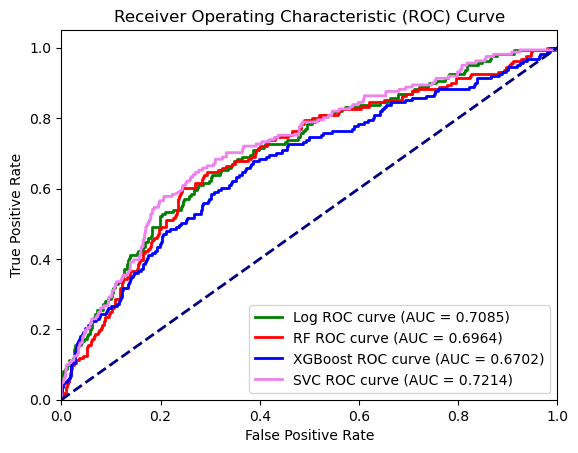

In [70]:
plt.plot(smote_log_fpr, smote_log_tpr,color='green',lw=2, label="Log ROC curve (AUC = %0.4f)" % log_smote_roc)
plt.plot(smote_rf_fpr, smote_rf_tpr, color='red',lw=2, label="RF ROC curve (AUC = %0.4f)" % rf_smote_roc)
plt.plot(smote_xg_fpr, smote_xg_tpr,color='blue',lw=2, label="XGBoost ROC curve (AUC = %0.4f)" % xg_smote_roc)
plt.plot(smote_svc_fpr, smote_svc_tpr,color='violet',lw=2, label="SVC ROC curve (AUC = %0.4f)" % svc_smote_roc)
plt.plot([0,1], [0,1], color='navy', linestyle='--', lw=2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')
plt.show()

# SHAP

In [71]:
import shap

In [72]:
shap.initjs()

In [73]:
explainer = shap.LinearExplainer(svc_best_model.named_steps.svcc, shap_x_train)
shap_values = explainer(shap_x_train)

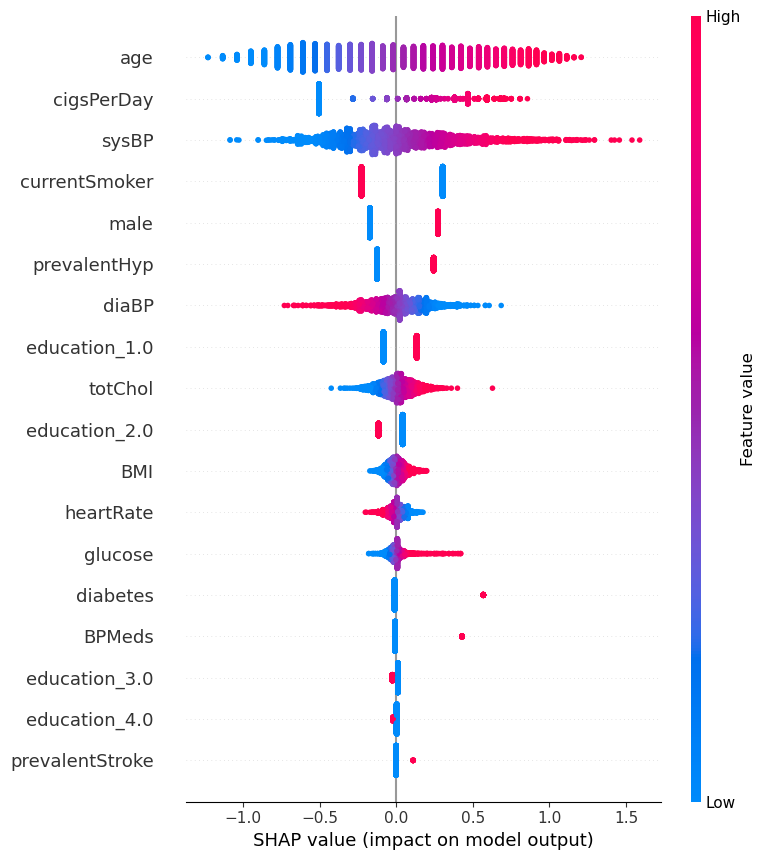

In [74]:
shap.summary_plot(shap_values, shap_x_train)

In [75]:
results = dict()

In [76]:
results['Model'] = model
results['Accuracy'] = accuracy
results['ROC-AUC'] = roc
results['Recall'] = recall

In [77]:
#pd.DataFrame(results).to_csv('results.csv')